# 2019.02.21 (DSAC2, 넷째날(마지막날))

# Logistic Regression

- 신용도 판단, 연간 구매량 기준 우수고객 여부 판단, 평가 지표 기준 합격 여부 판단, 건강 지표에 따른 건강 여부, 팀의 승리/패배 여부 예측 등


In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


https://www.datacamp.com.community/tutorials/understanding-logistic-regression-python

In [165]:
col_names = ['pregnant', 'glucose','bp','skin','insulin','bmi','pedigree','age','label']
pima = pd.read_csv('D:/DSAC/diabetes.csv', names = col_names)


In [166]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [167]:
# pima = pima.drop(pima.index[0])
pima = pima[pima.pregnant != 'Pregnancies']

pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [168]:
feature_cols = ['pregnant','glucose','bp','insulin','bmi','pedigree','age',]
X=pima[feature_cols]       # features
y=pima.label               # target (label)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()            # 실질적인 모델 이용
logreg.fit(X_train,y_train)

logreg.coef_, logreg.intercept_

y_pred = logreg.predict(X_test)          #여기까지

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)

cnf_matrix

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Text(0.5,15,'predicted label')

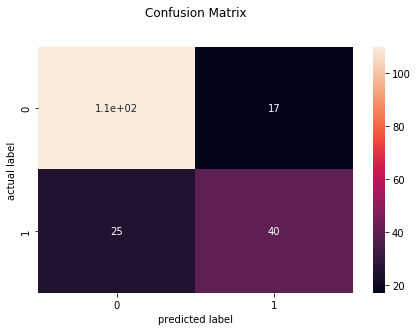

In [171]:
import seaborn as sns
class_names = [0,1]
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True)

plt.tight_layout()
plt.title('Confusion Matrix', y = 1.1)
plt.ylabel('actual label')
plt.xlabel('predicted label')

In [172]:
print('accuracy : ', metrics.accuracy_score(y_test, y_pred))
print('precision : ', metrics.precision_score(y_test, y_pred, pos_label='1'))
print('recall : ', metrics. recall_score(y_test, y_pred, pos_label='1'))

accuracy :  0.78125
precision :  0.7017543859649122
recall :  0.6153846153846154


In [173]:
# ROC Curve

y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba = y_pred_proba[:,1]

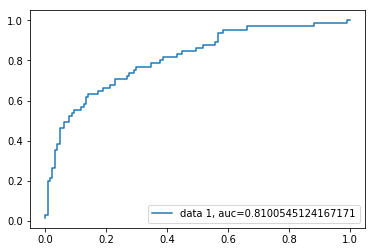

In [190]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred_proba, pos_label='1')
#auc = metrics.roc_auc_score(y_test, y_pred_proba)     # auc 값을 구해주는 것
auc = metrics.auc(fpr,tpr)     # auc 값을 구해주는 것

plt.plot(fpr,tpr,label='data 1, auc='+ str(auc))
plt.legend(loc=4)
plt.show()

In [188]:
result = pd.DataFrame(y_pred, columns = ['predict'])
result['real'] = np.array(y_test)
result['correct'] = (result.predict == result.real)
result['score'] = y_pred_proba

result.sort_values(by=['score'], ascending = False)

result

,predict,real,correct,score
0,0,0,True,0.122814
1,0,0,True,0.189087
2,1,1,True,0.742205
3,1,1,True,0.667186
4,1,1,True,0.723164
5,0,0,True,0.130864
6,0,0,True,0.239893
7,0,0,True,0.323706
8,0,0,True,0.156931
9,1,1,True,0.621337
